In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Employee-Attrition.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

### DATA PRE-PROCESSING

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### No Null values detected 

In [5]:
df.shape

(1470, 35)

In [6]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### DATA VISUALISATION

In [8]:
corr=df.corr()

<AxesSubplot:>

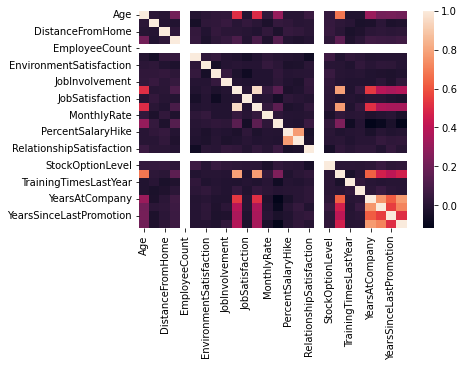

In [9]:
sns.heatmap(corr)

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

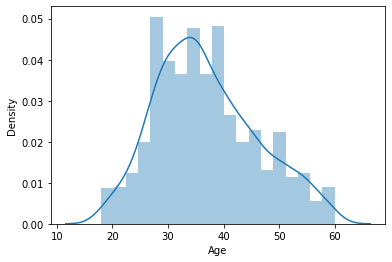

In [10]:
sns.distplot(df.Age)

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

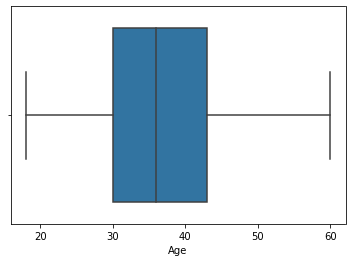

<Figure size 720x432 with 0 Axes>

In [11]:
sns.boxplot(df.Age)
plt.figure(figsize=(10, 6))

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DailyRate'>

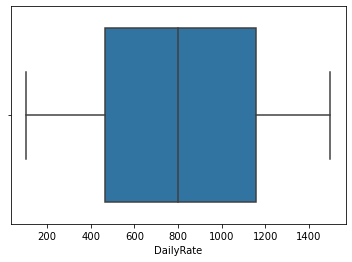

In [12]:
sns.boxplot(df.DailyRate)

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DistanceFromHome'>

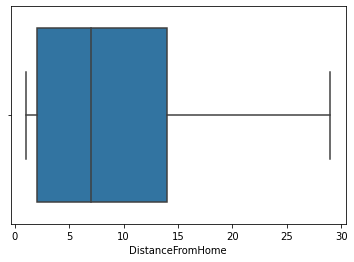

In [13]:
sns.boxplot(df['DistanceFromHome'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HourlyRate'>

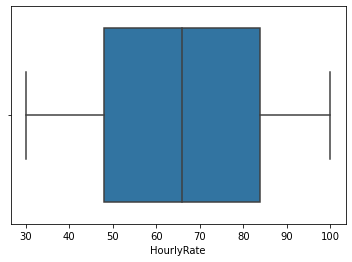

In [14]:
sns.boxplot(df['HourlyRate'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked'>

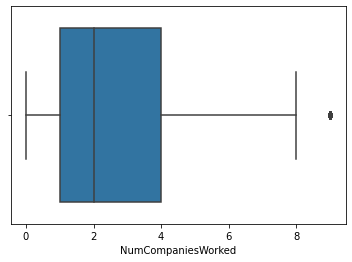

In [15]:
sns.boxplot(df['NumCompaniesWorked'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PercentSalaryHike'>

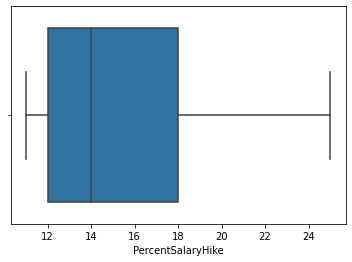

In [16]:
sns.boxplot(df['PercentSalaryHike'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

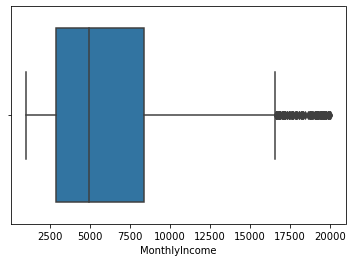

In [17]:
sns.boxplot(df['MonthlyIncome'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears'>

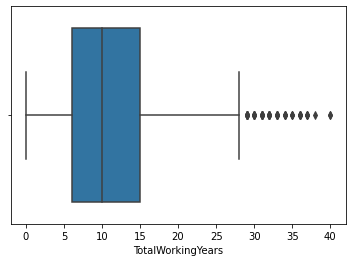

In [18]:
sns.boxplot(df['TotalWorkingYears'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear'>

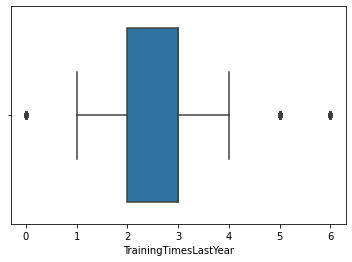

In [19]:
sns.boxplot(df['TrainingTimesLastYear'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany'>

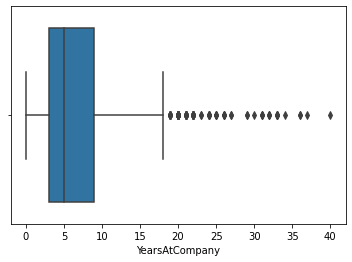

In [20]:
sns.boxplot(df['YearsAtCompany'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsInCurrentRole'>

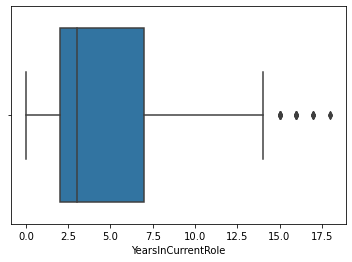

In [21]:
sns.boxplot(df['YearsInCurrentRole'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

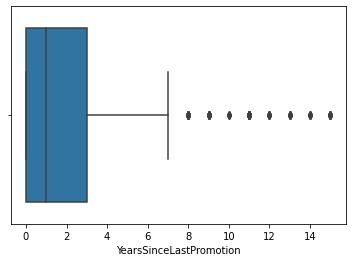

In [22]:
sns.boxplot(df['YearsSinceLastPromotion'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager'>

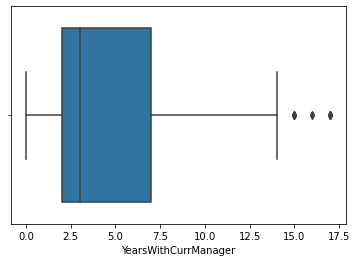

In [23]:
sns.boxplot(df['YearsWithCurrManager'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StockOptionLevel'>

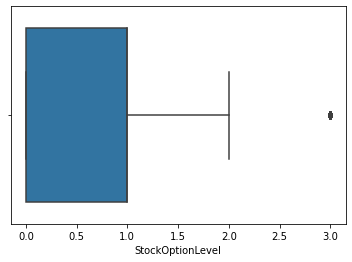

In [24]:
sns.boxplot(df.StockOptionLevel)

#### Outliers detected in Following attributes
    * YearsWithCurrManager
    * YearsSinceLastPromotion
    * YearsInCurrentRole
    * YearsAtCompany
    * TrainingTimesLastYear
    * TotalWorkingYears
    * NumCompaniesWorked
    * StockOptionlevel
    * Monthly income
    
#### Now Outlier removal

In [25]:
#YearsWithCurrManager
q1=df.YearsWithCurrManager.quantile(0.25)
q3=df.YearsWithCurrManager.quantile(0.75)
IQR=q3-q1
IQR

5.0

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager'>

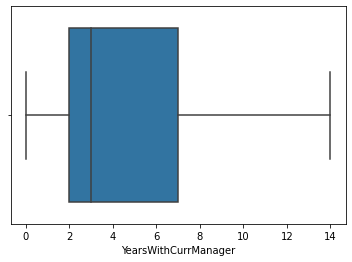

In [26]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[ (df['YearsWithCurrManager']<upper_limit ) ]
sns.boxplot(df['YearsWithCurrManager'])

In [27]:
#YearsSinceLastPromotion
q1=df.YearsSinceLastPromotion.quantile(0.25)
q3=df.YearsSinceLastPromotion.quantile(0.75)
IQR=q3-q1
IQR


2.0

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion'>

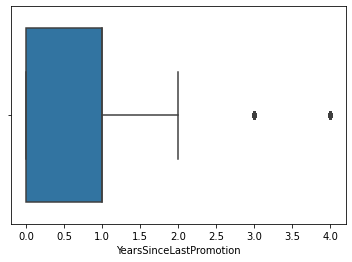

In [28]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[ (df['YearsSinceLastPromotion']<upper_limit ) ]
sns.boxplot(df['YearsSinceLastPromotion'])

In [29]:
#YearsWithCurrManager
q1=df.YearsInCurrentRole.quantile(0.25)
q3=df.YearsInCurrentRole.quantile(0.75)
IQR=q3-q1
IQR


3.0

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsInCurrentRole'>

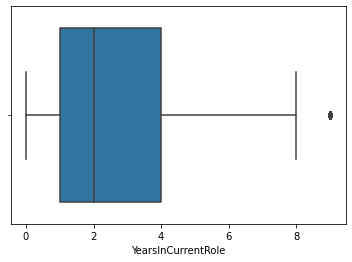

In [30]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[ (df['YearsInCurrentRole']<upper_limit ) ]
sns.boxplot(df['YearsInCurrentRole'])

In [31]:
#YearsWithCurrManager
q1=df.YearsAtCompany.quantile(0.25)
q3=df.YearsAtCompany.quantile(0.75)
IQR=q3-q1
IQR


5.0

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany'>

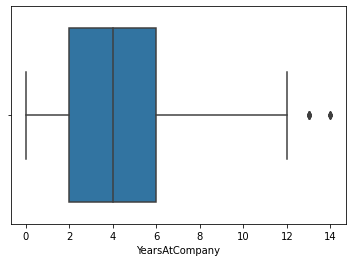

In [32]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[ (df['YearsAtCompany']<upper_limit ) ]
sns.boxplot(df['YearsAtCompany'])

In [33]:
#YearsWithCurrManager
q1=df.TrainingTimesLastYear.quantile(0.25)
q3=df.TrainingTimesLastYear.quantile(0.75)
IQR=q3-q1
IQR

1.0

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TrainingTimesLastYear'>

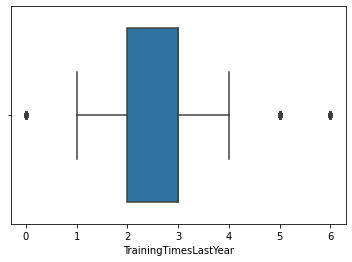

In [34]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[ (df['TrainingTimesLastYear']<upper_limit ) | (df['TrainingTimesLastYear']>lower_limit)]
sns.boxplot(df['TrainingTimesLastYear'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears'>

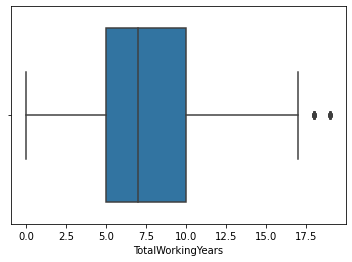

In [35]:
#YearsWithCurrManager
q1=df.TotalWorkingYears.quantile(0.25)
q3=df.TotalWorkingYears.quantile(0.75)
IQR=q3-q1
IQR
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[ (df['TotalWorkingYears']<upper_limit )]
sns.boxplot(df['TotalWorkingYears'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked'>

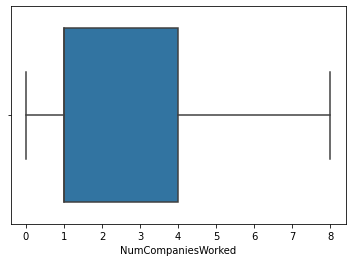

In [36]:
#YearsWithCurrManager
q1=df.NumCompaniesWorked.quantile(0.25)
q3=df.NumCompaniesWorked.quantile(0.75)
IQR=q3-q1
IQR
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[ (df['NumCompaniesWorked']<upper_limit )]
sns.boxplot(df['NumCompaniesWorked'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StockOptionLevel'>

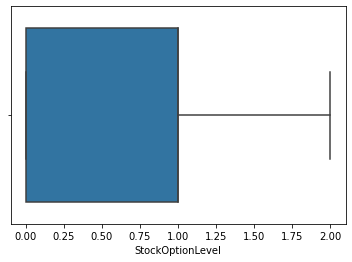

In [37]:
#YearsWithCurrManager
q1=df.StockOptionLevel.quantile(0.25)
q3=df.StockOptionLevel.quantile(0.75)
IQR=q3-q1
IQR
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[ (df['StockOptionLevel']<upper_limit )]
sns.boxplot(df['StockOptionLevel'])

C:\Users\kommi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

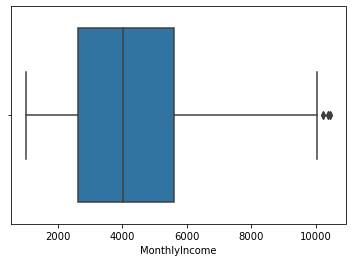

In [38]:
#MonthlyIncome
q1=df.MonthlyIncome.quantile(0.25)
q3=df.MonthlyIncome.quantile(0.75)
IQR=q3-q1
IQR
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df=df[ (df['MonthlyIncome']<upper_limit )]
sns.boxplot(df['MonthlyIncome'])

In [39]:
df.describe()

Age    DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  902.000000   902.000000        902.000000  902.000000          902.0   
mean    34.211752   799.273836          9.182927    2.827051            1.0   
std      8.298172   399.839801          7.925066    1.026302            0.0   
min     18.000000   103.000000          1.000000    1.000000            1.0   
25%     28.000000   465.500000          2.000000    2.000000            1.0   
50%     33.000000   805.000000          7.000000    3.000000            1.0   
75%     39.000000  1153.000000         14.000000    4.000000            1.0   
max     60.000000  1498.000000         29.000000    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count      902.000000               902.000000  902.000000      902.000000   
mean      1027.853659                 2.715078   66.440133        2.738359   
std        613.052180                 1.095736   20.226088        0.714720   
min          1.000000                 1.000000   30.000000        1.000000   
25%        484.250000                 2.000000   49.000000        2.000000   
50%       1010.500000                 3.000000   67.000000        3.000000   
75%       1576.250000                 4.000000   84.000000        3.000000   
max       2068.000000                 4.000000  100.000000        4.000000   

         JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  902.000000  ...                902.000000          902.0   
mean     1.583149  ...                  2.701774           80.0   
std      0.634963  ...                  1.089134            0.0   
min      1.000000  ...                  1.000000           80.0   
25%      1.000000  ...                  2.000000           80.0   
50%      2.000000  ...                  3.000000           80.0   
75%      2.000000  ...                  4.000000           80.0   
max      3.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        902.000000         902.000000             902.000000   
mean           0.637472           7.517738               2.784922   
std            0.691195           4.218139               1.321837   
min            0.000000           0.000000               0.000000   
25%            0.000000           5.000000               2.000000   
50%            1.000000           7.000000               3.000000   
75%            1.000000          10.000000               3.000000   
max            2.000000          19.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       902.000000      902.000000          902.000000   
mean          2.737251        4.565410            2.921286   
std           0.716639        3.058737            2.506686   
min           1.000000        0.000000            0.000000   
25%           2.000000        2.000000            1.000000   
50%           3.000000        4.000000            2.000000   
75%           3.000000        6.000000            4.000000   
max           4.000000       14.000000            9.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               902.000000            902.000000  
mean                  0.789357              2.914634  
std                   1.001651              2.638490  
min                   0.000000              0.000000  
25%                   0.000000              1.000000  
50%                   1.000000              2.000000  
75%                   1.000000              4.000000  
max                   4.000000             12.000000  

[8 rows x 26 columns]

#### We can observe many mean values has changed due to removal of outliers

In [40]:
df.shape

(902, 35)

### SEPARATING DEPENDENT AND INDEPENDENT VARIABLES

In [41]:
x_d=df.iloc[:,:]
X=x_d.drop(columns=["Attrition","EmployeeCount","StandardHours","Over18"],axis=1)

In [42]:
X.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
5   32  Travel_Frequently       1005  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 1          2  Life Sciences               1   
1                 8          1  Life Sciences               2   
2                 2          2          Other               4   
3                 3          4  Life Sciences               5   
5                 2          2  Life Sciences               8   

   EnvironmentSatisfaction  Gender  ...  PerformanceRating  \
0                        2  Female  ...                  3   
1                        3    Male  ...                  4   
2                        4    Male  ...                  3   
3                        4  Female  ...                  3   
5                        4    Male  ...                  3   

   RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
0                         1                 0                 8   
1                         4                 1                10   
2                         2                 0                 7   
3                         3                 0                 8   
5                         3                 0                 8   

   TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0               1               6                   4   
1                      3               3              10                   7   
2                      3               3               0                   0   
3                      3               3               8                   7   
5                      2               2               7                   7   

   YearsSinceLastPromotion YearsWithCurrManager  
0                        0                    5  
1                        1                    7  
2                        0                    0  
3                        3                    0  
5                        3                    6  

[5 rows x 31 columns]

In [43]:
y=df["Attrition"]

In [44]:
y.head()

0    Yes
1     No
2    Yes
3     No
5     No
Name: Attrition, dtype: object

In [45]:
l=df.iloc[:,19:]
l.head()

MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
5        11864                   0      Y       No                 13   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
5                  3                         3             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
5                 0                  8                      2   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
5                2               7                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
5                        3                     6

In [46]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
5                 2          2  Life Sciences              1               8   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
5  ...                         3            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
5                  8                      2               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
5                  7                        3                     6  

[5 rows x 35 columns]

### ENCODING

In [47]:
x_encoded=pd.get_dummies(X,columns=["Department","BusinessTravel","EducationField","Gender","OverTime","JobRole","MaritalStatus"])

In [48]:
x_encoded

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0      41       1102                 1          2               1   
1      49        279                 8          1               2   
2      37       1373                 2          2               4   
3      33       1392                 3          4               5   
5      32       1005                 2          2               8   
...   ...        ...               ...        ...             ...   
1465   36        884                23          2            2061   
1466   39        613                 6          1            2062   
1467   27        155                 4          3            2064   
1468   49       1023                 2          3            2065   
1469   34        628                 8          3            2068   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2   
1                           3          61               2         2   
2                           4          92               2         1   
3                           4          56               3         1   
5                           4          79               3         1   
...                       ...         ...             ...       ...   
1465                        3          41               4         2   
1466                        4          42               2         3   
1467                        2          87               4         2   
1468                        4          63               2         2   
1469                        2          82               4         2   

      JobSatisfaction  ...  JobRole_Healthcare Representative  \
0                   4  ...                                  0   
1                   2  ...                                  0   
2                   3  ...                                  0   
3                   3  ...                                  0   
5                   4  ...                                  0   
...               ...  ...                                ...   
1465                4  ...                                  0   
1466                1  ...                                  1   
1467                2  ...                                  0   
1468                2  ...                                  0   
1469                3  ...                                  0   

      JobRole_Human Resources  JobRole_Laboratory Technician  \
0                           0                              0   
1                           0                              0   
2                           0                              1   
3                           0                              0   
5                           0                              1   
...                       ...                            ...   
1465                        0                              1   
1466                        0                              0   
1467                        0                              0   
1468                        0                              0   
1469                        0                              1   

      JobRole_Manufacturing Director  JobRole_Research Scientist  \
0                                  0                           0   
1                                  0                           1   
2                                  0                           0   
3                                  0                           1   
5                                  0                           0   
...                              ...                         ...   
1465                               0                           0   
1466                               0                           0   
1467                               1                           0   
1468                               0                           0   
1469                      

In [49]:
y_encoded=pd.get_dummies(y,drop_first=True)

In [50]:
y_encoded.head()

Yes
0    1
1    0
2    1
3    0
5    0

### FEATURE SCALING

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
ms=MinMaxScaler()

In [53]:
X_Scaled=pd.DataFrame(ms.fit_transform(x_encoded),columns=x_encoded.columns)

In [54]:
X_Scaled.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0  0.547619   0.716129          0.000000       0.25        0.000000   
1  0.738095   0.126165          0.250000       0.00        0.000484   
2  0.452381   0.910394          0.035714       0.25        0.001451   
3  0.357143   0.924014          0.071429       0.75        0.001935   
4  0.333333   0.646595          0.035714       0.25        0.003387   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                 0.333333    0.914286        0.666667       0.5   
1                 0.666667    0.442857        0.333333       0.5   
2                 1.000000    0.885714        0.333333       0.0   
3                 1.000000    0.371429        0.666667       0.0   
4                 1.000000    0.700000        0.666667       0.0   

   JobSatisfaction  ...  JobRole_Healthcare Representative  \
0         1.000000  ...                                0.0   
1         0.333333  ...                                0.0   
2         0.666667  ...                                0.0   
3         0.666667  ...                                0.0   
4         1.000000  ...                                0.0   

   JobRole_Human Resources  JobRole_Laboratory Technician  \
0                      0.0                            0.0   
1                      0.0                            0.0   
2                      0.0                            1.0   
3                      0.0                            0.0   
4                      0.0                            1.0   

   JobRole_Manufacturing Director  JobRole_Research Scientist  \
0                             0.0                         0.0   
1                             0.0                         1.0   
2                             0.0                         0.0   
3                             0.0                         1.0   
4                             0.0                         0.0   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                      1.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  
0                     0.0                    0.0                   1.0  
1                     0.0                    1.0                   0.0  
2                     0.0                    0.0                   1.0  
3                     0.0                    1.0                   0.0  
4                     0.0                    0.0                   1.0  

[5 rows x 50 columns]

### Splitting Dataset into Train and Test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,y_encoded,test_size=0.2,random_state=0)

In [57]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((721, 50), (181, 50), (721, 1), (181, 1))

### •	Model Building

In [58]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [59]:
model.fit(X_train,y_train)

C:\Users\kommi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [60]:
predict=model.predict(X_test)

In [61]:
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0], dtype=uint8)

In [62]:
y_test

Yes
399     0
1182    0
583     0
1290    1
1061    0
...   ...
2       1
643     0
1292    0
1383    0
845     0

[181 rows x 1 columns]

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [64]:
accuracy_score(y_test,predict)

0.8342541436464088

In [65]:
confusion_matrix(y_test,predict)

array([[133,   7],
       [ 23,  18]], dtype=int64)

In [66]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       140
           1       0.72      0.44      0.55        41

    accuracy                           0.83       181
   macro avg       0.79      0.69      0.72       181
weighted avg       0.82      0.83      0.82       181



### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [68]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
Predict=dtc.predict(X_test)

In [70]:
Predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0], dtype=uint8)

In [71]:
accuracy_score(y_test,Predict)

0.7016574585635359

In [72]:
confusion_matrix(y_test,Predict)

array([[111,  29],
       [ 25,  16]], dtype=int64)

In [73]:
print(classification_report(y_test,Predict))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       140
           1       0.36      0.39      0.37        41

    accuracy                           0.70       181
   macro avg       0.59      0.59      0.59       181
weighted avg       0.71      0.70      0.71       181



In [74]:
y_test=y_test['Yes']

In [75]:
pd.crosstab(y_test,Predict)

col_0    0   1
Yes           
0      111  29
1       25  16

[Text(0.434375, 0.96875, 'X[39] <= 0.5\ngini = 0.294\nsamples = 721\nvalue = [592, 129]'),
 Text(0.19638157894736843, 0.90625, 'X[17] <= 0.079\ngini = 0.2\nsamples = 525\nvalue = [466, 59]'),
 Text(0.06842105263157895, 0.84375, 'X[44] <= 0.5\ngini = 0.48\nsamples = 45\nvalue = [27, 18]'),
 Text(0.042105263157894736, 0.78125, 'X[6] <= 0.407\ngini = 0.495\nsamples = 31\nvalue = [14, 17]'),
 Text(0.021052631578947368, 0.71875, 'X[23] <= 0.042\ngini = 0.165\nsamples = 11\nvalue = [1, 10]'),
 Text(0.010526315789473684, 0.65625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.031578947368421054, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.06315789473684211, 0.71875, 'X[9] <= 0.167\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(0.05263157894736842, 0.65625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.07368421052631578, 0.65625, 'X[13] <= 0.179\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(0.06315789473684211, 0.59375, 'X[6] <= 0.686\ngini = 0.5\nsa

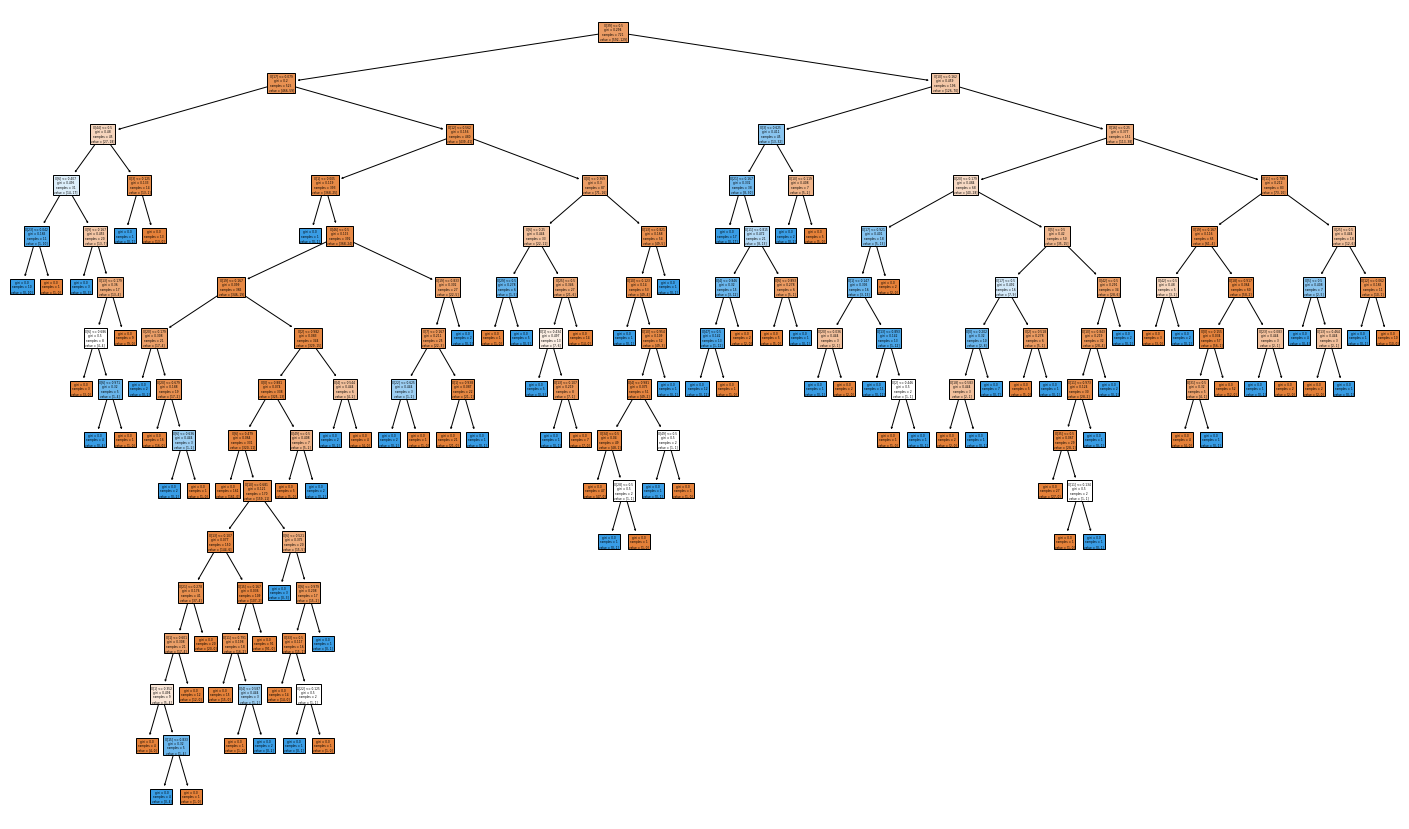

In [76]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [77]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [78]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [79]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best']},
             scoring='accuracy')

In [80]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [81]:
dtc_cv=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=3,
 max_features='sqrt',
 splitter='best')
dtc_cv.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [82]:
predict=dtc_cv.predict(X_test)

In [83]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       140
           1       0.50      0.05      0.09        41

    accuracy                           0.77       181
   macro avg       0.64      0.52      0.48       181
weighted avg       0.72      0.77      0.69       181



In [85]:
accuracy_score(y_test,predict)

0.7734806629834254

### Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  

In [88]:
random_forest.fit(X_train, y_train)

C:\Users\kommi\AppData\Local\Temp\ipykernel_3576\2566748861.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [89]:
y_pred = random_forest.predict(X_test)

In [90]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=uint8)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8066298342541437


In [92]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       140
           1       0.80      0.20      0.31        41

    accuracy                           0.81       181
   macro avg       0.80      0.59      0.60       181
weighted avg       0.81      0.81      0.76       181

